## ATTENTIOM-LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time_series_data = pd.read_csv("D:/all_machine_learning_trials/cv_2_1/sequential_data/traffic_volume.csv")
time_series_data

,DATE,TIME,BICYCLE,BUS,CAR,JEEPNEY,MOTORCYCLE,MULTICAB,TRICYCLE,TRUCK,VAN,TOTAL
0,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
1,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
2,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
3,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
4,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3818,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0
3819,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0
3820,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0
3821,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0


In [2]:
time_series_data.shape

(3823, 12)

In [3]:
# dataset = dataset.drop([0])

## Data cleaning

In [3]:

df = time_series_data.drop_duplicates(subset=["TIME"])
df = df.reset_index()
df.shape

(288, 13)

In [ ]:
df[100:150]

In [4]:
df['datetime'] = df['DATE'] + " " + df['TIME']

df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df

,index,DATE,TIME,BICYCLE,BUS,CAR,JEEPNEY,MOTORCYCLE,MULTICAB,TRICYCLE,TRUCK,VAN,TOTAL,datetime
datetime,,,,,,,,,,,,,,
2024-11-18 00:05:00,0,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 00:05:00
2024-11-18 00:10:00,14,2024-11-18,00:10:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 00:10:00
2024-11-18 00:15:00,28,2024-11-18,00:15:00,0,0,0,1,0,0,0,0,0,1,2024-11-18 00:15:00
2024-11-18 00:20:00,42,2024-11-18,00:20:00,0,0,0,1,0,0,0,0,0,0,2024-11-18 00:20:00
2024-11-18 00:25:00,56,2024-11-18,00:25:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 00:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-18 23:40:00,3759,2024-11-18,23:40:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 23:40:00
2024-11-18 23:45:00,3772,2024-11-18,23:45:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 23:45:00
2024-11-18 23:50:00,3785,2024-11-18,23:50:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 23:50:00


In [5]:
df[['INTERVAL_COUNT']] = df[['TOTAL']]
df = df[['INTERVAL_COUNT']]
df

,INTERVAL_COUNT
datetime,
2024-11-18 00:05:00,0
2024-11-18 00:10:00,0
2024-11-18 00:15:00,1
2024-11-18 00:20:00,0
2024-11-18 00:25:00,0
...,...
2024-11-18 23:40:00,0
2024-11-18 23:45:00,0
2024-11-18 23:50:00,0


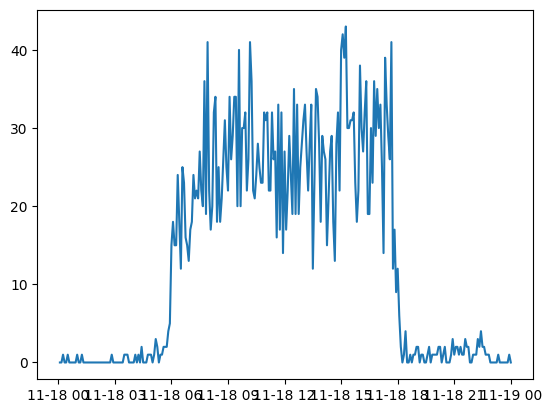

In [6]:
interval_count = df['INTERVAL_COUNT']
plt.plot(interval_count)

## TRAINING LSTM MODEL

In [7]:
import torch

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [8]:
interval_count.isna()

datetime
2024-11-18 00:05:00    False
2024-11-18 00:10:00    False
2024-11-18 00:15:00    False
2024-11-18 00:20:00    False
2024-11-18 00:25:00    False
                       ...  
2024-11-18 23:40:00    False
2024-11-18 23:45:00    False
2024-11-18 23:50:00    False
2024-11-18 23:55:00    False
2024-11-19 00:00:00    False
Name: INTERVAL_COUNT, Length: 288, dtype: bool

### Data Preprocessing

In [9]:
def df_to_timeseries(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        future_val = df_as_np[i+5]
        y.append(future_val)
    return np.array(X), np.array(y)

In [10]:
WINDOW_SIZE = 6

X, y = df_to_timeseries(interval_count, WINDOW_SIZE)
X.shape, y.shape

((282, 5, 1), (282,))

In [11]:
# TRAINING
X_train, y_train = X[:197], y[:197] # 80%
X_val, y_val = X[197:253], y[197:253] # 20%
X_test, y_test = X[253:], y[253:] # 10%

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((197, 5, 1), (197,), (56, 5, 1), (56,), (29, 5, 1), (29,))

In [37]:
import keras
from keras import layers
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional




def biderectional_lstm_attention_model(input_shape):

    inputs = keras.Input(shape=input_shape)
    
    lstm = Bidirectional(LSTM(256, return_sequences=True))(inputs)
 


    # Attention mechanism
    attention = layers.Dense(1, activation='tanh')(lstm)
    attention = layers.Flatten()(attention)
    attention = layers.Activation('softmax')(attention)
    attention = layers.RepeatVector(512)(attention)
    attention = layers.Permute([2, 1])(attention)
    attention = layers.Multiply()([lstm, attention])
    attention = layers.Lambda(lambda x: tf.reduce_sum(x, axis=1))(attention)

    # Output layer
    outputs = layers.Dense(1)(attention)

    # Compile the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
    return model

In [38]:
model = biderectional_lstm_attention_model(input_shape = (5, 1))

In [39]:
checkpoint = ModelCheckpoint('attention_lstm_model/checkpoint.model.keras', save_best_only=True)


In [40]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[checkpoint])

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 462.4506 - root_mean_squared_error: 21.5018 - val_loss: 178.9760 - val_root_mean_squared_error: 13.3782
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 432.3657 - root_mean_squared_error: 20.7766 - val_loss: 172.7055 - val_root_mean_squared_error: 13.1417
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 420.3437 - root_mean_squared_error: 20.5010 - val_loss: 166.5728 - val_root_mean_squared_error: 12.9063
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 405.2130 - root_mean_squared_error: 20.1288 - val_loss: 160.6725 - val_root_mean_squared_error: 12.6757
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 360.2628 - root_mean_squared_error: 18.9279 - val_loss: 154.7467 - val_root_mean_squared_error: 12.4397
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 369.0331 - root_mean_squared_error: 19.2056 - val_loss: 148.6328 - val_root_mean_squared_error: 12.1915
Epoch 7/200
7/7 ━━━━━━━━━━━

In [42]:
# from tensorflow.keras.models import load_model
# attention_lstm_model = load_model('attention_lstm_model/checkpoint.model.keras')

In [43]:
date_time = df.index[:197]

train_predictions = model.predict(X_train).flatten()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [44]:
train_predictions.shape

(197,)

In [45]:
train_results = pd.DataFrame(data={'Train Predictions' :train_predictions, 'Actuals' :y_train})
train_results.index = date_time
train_results

,Train Predictions,Actuals
datetime,,
2024-11-18 00:05:00,0.063619,1
2024-11-18 00:10:00,0.363513,0
2024-11-18 00:15:00,0.235462,0
2024-11-18 00:20:00,0.063619,0
2024-11-18 00:25:00,-0.010951,0
...,...,...
2024-11-18 16:05:00,27.002516,19
2024-11-18 16:10:00,27.252880,30
2024-11-18 16:15:00,27.536867,23


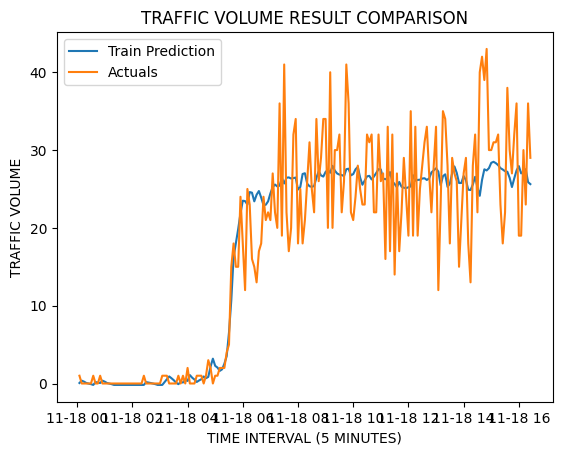

In [46]:
plt.plot(train_results['Train Predictions'], label='Train Prediction')
plt.plot(train_results['Actuals'], label='Actuals')

plt.legend()
plt.title('TRAFFIC VOLUME RESULT COMPARISON')
plt.xlabel('TIME INTERVAL (5 MINUTES)')
plt.ylabel('TRAFFIC VOLUME')
plt.show()

In [47]:
from sklearn.metrics import r2_score, mean_squared_error

print ('R-Squared:',r2_score(y_train, train_predictions))
print ('Mean squared error:', mean_squared_error (y_train, train_predictions))

R-Squared: 0.8298497200012207
Mean squared error: 29.903030395507812
